# UTS DL No 2
**Raymoond 2301872381**

# Input Dataset
Disini saya menginput dataset dari kaggle yaitu cat vs dog dan menginput setiap libary yang akan digunakan dalam coding

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raymondefendi","key":"e70d8fce85f9aeb4c75a2fd689ba3ece"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-21 16:54:23          16249  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9829  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4514  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3587  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 98% 771M/788M [00:04<00:00, 164MB/s]
100% 788M/788M [00:04<00:00, 168MB/s]


In [8]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [9]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 98 kB 4.9 MB/s 


In [10]:
import os
from distutils.dir_util import copy_tree
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, experimental

In [11]:
# copy data current directory to working directory
main_dir = "/content/PetImages"

# create dataset directory path
work_dir = "/kaggle/working/PetImages/"

copy_tree(main_dir, work_dir)

['/kaggle/working/PetImages/Dog/71.jpg',
 '/kaggle/working/PetImages/Dog/11648.jpg',
 '/kaggle/working/PetImages/Dog/1024.jpg',
 '/kaggle/working/PetImages/Dog/2739.jpg',
 '/kaggle/working/PetImages/Dog/5977.jpg',
 '/kaggle/working/PetImages/Dog/7651.jpg',
 '/kaggle/working/PetImages/Dog/6192.jpg',
 '/kaggle/working/PetImages/Dog/11116.jpg',
 '/kaggle/working/PetImages/Dog/9903.jpg',
 '/kaggle/working/PetImages/Dog/5541.jpg',
 '/kaggle/working/PetImages/Dog/9105.jpg',
 '/kaggle/working/PetImages/Dog/5490.jpg',
 '/kaggle/working/PetImages/Dog/7931.jpg',
 '/kaggle/working/PetImages/Dog/5699.jpg',
 '/kaggle/working/PetImages/Dog/12038.jpg',
 '/kaggle/working/PetImages/Dog/8544.jpg',
 '/kaggle/working/PetImages/Dog/7849.jpg',
 '/kaggle/working/PetImages/Dog/12328.jpg',
 '/kaggle/working/PetImages/Dog/802.jpg',
 '/kaggle/working/PetImages/Dog/8443.jpg',
 '/kaggle/working/PetImages/Dog/4776.jpg',
 '/kaggle/working/PetImages/Dog/11408.jpg',
 '/kaggle/working/PetImages/Dog/7030.jpg',
 '/kaggle

# Filter & remove images & Spliting data
Disini saya mengfilter, dan menghampus corrup image dan null image agar data yang dicapai lebih baik lagi

Disini saya juga melakukan spliting data untuk diproses ke tahapp selanjutnya

In [12]:
# Let's create function to filter & remove corrupted images
def CorruptImage():
    num_corrupted = 0
    for category in ("Cat", "Dog"):
        path = os.path.join(work_dir, category)

        for img in os.listdir(path):
            image_path = os.path.join(path, img)
            try:
                file_Obj = open(image_path, "rb")
                is_jfif = tf.compat.as_bytes("JFIF") in file_Obj.peek(10)
            finally:
                file_Obj.close()
            
            if not is_jfif:
                num_corrupted +=1
                os.remove(image_path)
    print("Total deleted images is = %d" % num_corrupted)

CorruptImage()

Total deleted images is = 1590


In [13]:
# Let's function to remove non jpg images
def NonJpg():
    j=0
    for catagory in os.listdir(work_dir):
        sub_folder = os.path.join(work_dir, catagory)
        for name in os.listdir(sub_folder):
            img_path = os.path.join(sub_folder,name)
            if name.split('.')[1] == 'jpg':
                if os.path.getsize(img_path) <= 0:
                    if os.path.isfile(img_path) == False:
                        print(img_path)
                    os.remove(img_path)
                elif os.path.getsize(img_path) > 0:
                    j +=1
            if name.split('.')[1] != 'jpg':
                print(img_path)
                os.remove(img_path)
    print(j)
NonJpg()

/kaggle/working/PetImages/Dog/Thumbs.db
/kaggle/working/PetImages/Cat/Thumbs.db
23410


In [14]:
#Let's split image dataset into Train & validation

image_size = (128, 128)

train_dataset = preprocessing.image_dataset_from_directory(
    work_dir,
    image_size = image_size,
    validation_split= 0.2,
    subset="training",
    batch_size =32,    
    seed = 1337,
    shuffle = True,
)

test_dataset = preprocessing.image_dataset_from_directory(
    work_dir,
    image_size = image_size,
    validation_split = 0.2,
    subset = "validation",
    batch_size = 32,    
    seed = 1337,
    shuffle= True,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


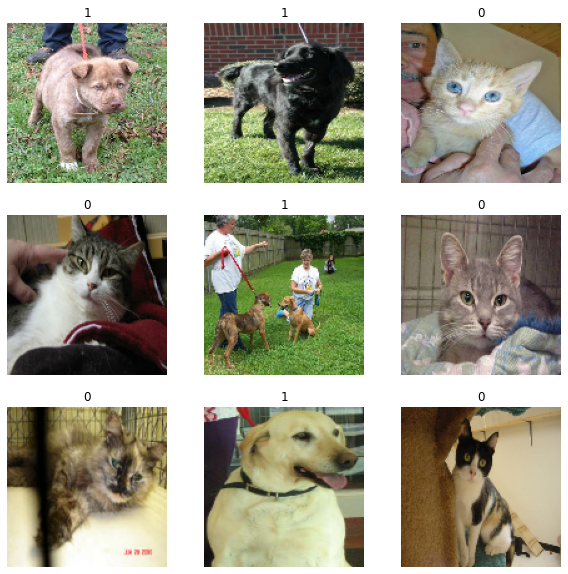

In [15]:
# image visualization function
def dataVisual():
    plt.figure(figsize=(10,10))
    for images, labels in train_dataset.take(1):
        for i in range(9):
            ax =plt.subplot(3,3, i+1)
            plt.imshow((images[i].numpy().astype("uint8")))
            plt.title(int(labels[i]))
            plt.axis("off")

dataVisual()

# Callback,Model,Tuning & Hasil

Disini saya melakukan callback terhadap fuction yang ada dan juga saya membuat model dan tune model dengan dense yang sudah ditentukan, dan akhirnya melakukan print terhadap data yang sudah di modeling

In [16]:
# Let's create callback function
earlystop = EarlyStopping(monitor="loss", patience=5)
l_rate_reduce = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1, min_lr=0.2)
callback = [earlystop, l_rate_reduce]

In [17]:
if tf.keras.backend.image_data_format() == "channels_first":
    input_shapes = (3, 128, 128)
else:
    input_shapes = (128, 128, 3)

model=Sequential()

model.add(experimental.preprocessing.Rescaling(1.0/255, input_shape=(input_shapes)))

model.add(Conv2D(16,(3,3),activation='relu',input_shape=input_shapes))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

hist = model.fit(
    train_dataset, 
    epochs=10,
    verbose=1, 
    callbacks=callback, 
    validation_data=test_dataset,
)

Epoch 1/10
586/586 [==============================] - 51s 68ms/step - loss: 0.6876 - accuracy: 0.6466 - val_loss: 0.6091 - val_accuracy: 0.6606 - lr: 0.0010
Epoch 2/10
586/586 [==============================] - 40s 67ms/step - loss: 0.5224 - accuracy: 0.7407 - val_loss: 0.6695 - val_accuracy: 0.6632 - lr: 0.0010
Epoch 3/10
586/586 [==============================] - 39s 67ms/step - loss: 0.4597 - accuracy: 0.7825 - val_loss: 0.6018 - val_accuracy: 0.7305 - lr: 0.0010
Epoch 4/10
586/586 [==============================] - 39s 67ms/step - loss: 0.4204 - accuracy: 0.8049 - val_loss: 0.4529 - val_accuracy: 0.7997 - lr: 0.0010
Epoch 5/10
586/586 [==============================] - 39s 66ms/step - loss: 0.3813 - accuracy: 0.8258 - val_loss: 0.3839 - val_accuracy: 0.8281 - lr: 0.0010
Epoch 6/10
586/586 [==============================] - 39s 66ms/step - loss: 0.3471 - accuracy: 0.8444 - val_loss: 0.7612 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 7/10
586/586 [==============================] - 38s 

Dan akhirnya kita bisa lihat hasil akir dari data ini kita mendapat akurasi 88,5& dengan vall losw 58 %